In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prerequisites:

#### Importing the Data:

In [3]:
calls = pd.read_csv("Desktop/911.csv", usecols=[*range(0, 9)])
calls.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1


#### Summary of Dataset:

In [4]:
print("Rows     :", calls.shape[0])
print("Columns  :", calls.shape[1])
print("\nFeatures :", calls.columns.tolist())
print("\nMissing values :", calls.isnull().values.sum())
print("\nUnique values : \n", calls.nunique())

Rows     : 645716
Columns  : 9

Features : ['lat', 'lng', 'desc', 'zip', 'title', 'timeStamp', 'twp', 'addr', 'e']

Missing values : 78505

Unique values : 
 lat           25756
lng           25786
desc         645480
zip             201
title           147
timeStamp    623574
twp              68
addr          40981
e                 1
dtype: int64


# PART A: (Data Cleaning).

#### TASK 1: Find & Drop Rows with ANY NaN Values.

In [5]:
calls.isna().any(axis=1)
calls.dropna(how="any", inplace=True)

#### TASK 2: Convert Columns to their Correct Type (to_datetime).

In [6]:
calls.timeStamp = pd.to_datetime(calls.timeStamp)

#### TASK 3: Remove Dummy Variable 'e' - (always 1).

In [7]:
calls.drop(columns=["e"], axis=1, inplace=True)

# PART B: (Data Exploration).

#### QUESTION 1: Top 10 Townships for 911 Calls?

In [8]:
calls.twp.value_counts().head(10)

LOWER MERION        46369
ABINGTON            37164
NORRISTOWN          34778
POTTSTOWN           25998
CHELTENHAM          25946
UPPER MERION        24284
LOWER PROVIDENCE    20427
UPPER MORELAND      20200
HORSHAM             16622
PLYMOUTH            15590
Name: twp, dtype: int64

In [9]:
## LOWER MERION has the 'Highest' number of Calls!

#### QUESTION 2: Top 10 Zip Codes for 911 Calls?

In [10]:
calls.zip.value_counts().head(10)

19401.0    44237
19464.0    42622
19403.0    33934
19446.0    31322
19406.0    21857
19002.0    20562
19468.0    18479
19046.0    17440
19454.0    17196
19090.0    16926
Name: zip, dtype: int64

In [11]:
## ZIPCODE 19401 (Norristown in Pennsylvania) has the 'Highest' number of Calls!

#### QUESTION 3: Most Common Category/Reason for 911 Calls?

In [12]:
calls["Reason"] = calls.title.apply(lambda x: x.split(":")[0])
results = calls.Reason.value_counts()

print(results)

EMS        295734
Traffic    185512
Fire        86128
Name: Reason, dtype: int64


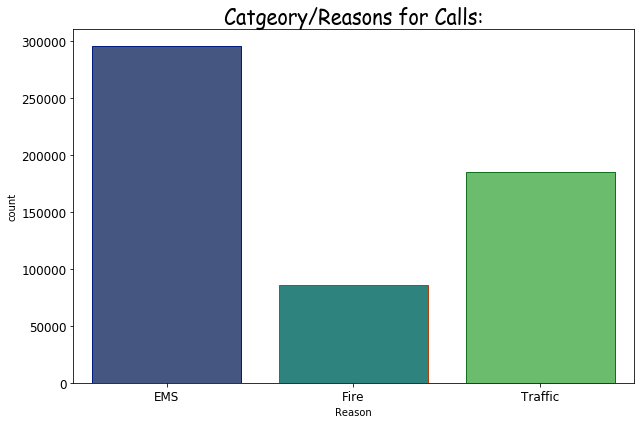

In [13]:
plt.figure(figsize=(9, 6))
plt.title("Catgeory/Reasons for Calls:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

sns.countplot(calls["Reason"], edgecolor=sns.color_palette("dark", 3), palette="viridis", data=calls)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

#### QUESTION 4: Most Common Reason based on the (Day) of the Week?

In [15]:
calls["Day of Week"] = calls.timeStamp.dt.day_name()

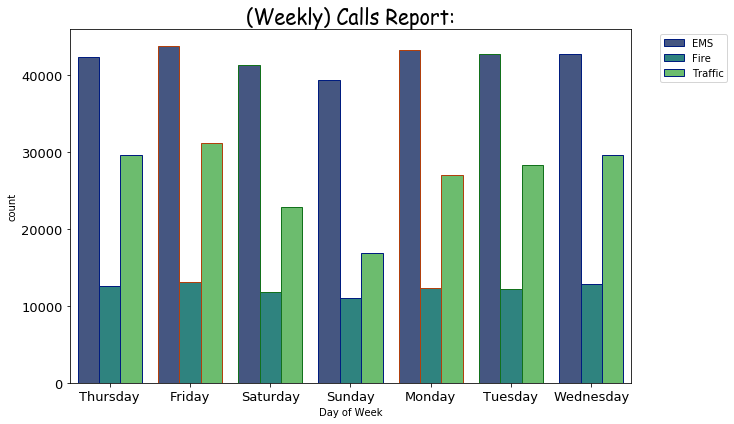

In [18]:
plt.figure(figsize=(9, 6))
plt.title("(Weekly) Calls Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

sns.countplot(calls["Day of Week"], hue=calls["Reason"], edgecolor=sns.color_palette("dark", 3), palette="viridis", data=calls)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.18, 1))
plt.show()

In [19]:
## Conclusion:
## On any given Day, EMS related calls are High and Fire is Low.
## Most Emergency calls occur on 'Friday', EMS is also more.
## Traffic related calls are Low during the Weekend, which makes sense.
## Moreover, EMS related calls are also Low during the Weekend. Assumption: people prefer to stay indoors on the Weekend?

#### QUESTION 4: Most Common Reason based on each (Month)?

In [20]:
calls["Month"] = calls.timeStamp.dt.month

mmap = {1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
calls.Month = calls.Month.map(mmap)

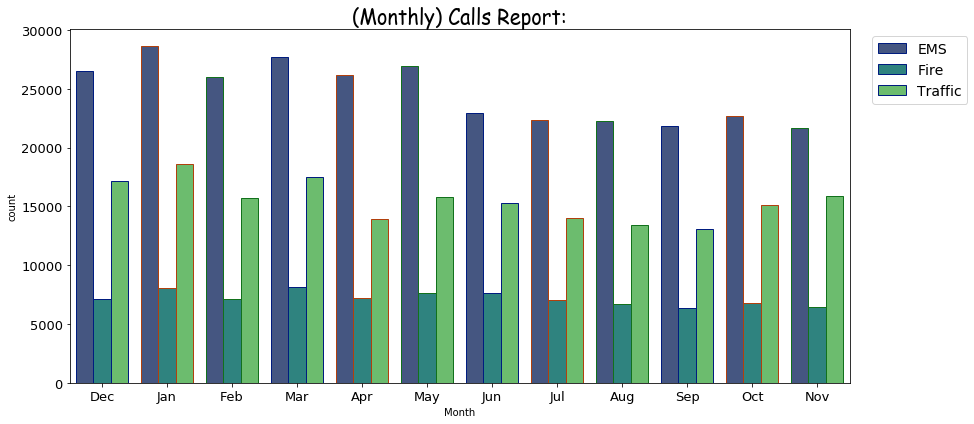

In [24]:
plt.figure(figsize=(12, 6))
plt.title("(Monthly) Calls Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

sns.countplot(calls["Month"], hue=calls["Reason"], edgecolor=sns.color_palette("dark", 3), palette="viridis", data=calls)
plt.tick_params(labelsize=13)
plt.tight_layout()
plt.legend(prop={"size": 14}, bbox_to_anchor=(1.16, 1))
plt.show()

In [25]:
## Conclusion:
## Again, on any given Day, EMS related calls are High and Fire is Low.
## Most Emergency calls occur in the Months of (Jan, Mar and Oct).
## Fewer Emergency calls during the Holiday Season (Jul, Aug and Sep), which makes sense.
## Assumption: people prefer to walk than Drive or use Public Transport?

#### QUESTION 5: (EMS) calls per Day?

In [26]:
calls["Date"] = calls.timeStamp.dt.date
ems_results = calls[calls.Reason == "EMS"].groupby("Date")["Reason"].count()

print(ems_results.head(10))

Date
2015-12-10     53
2015-12-11    166
2015-12-12    170
2015-12-13    179
2015-12-14    200
2015-12-15    180
2015-12-16    185
2015-12-17    151
2015-12-18    151
2015-12-19    114
Name: Reason, dtype: int64


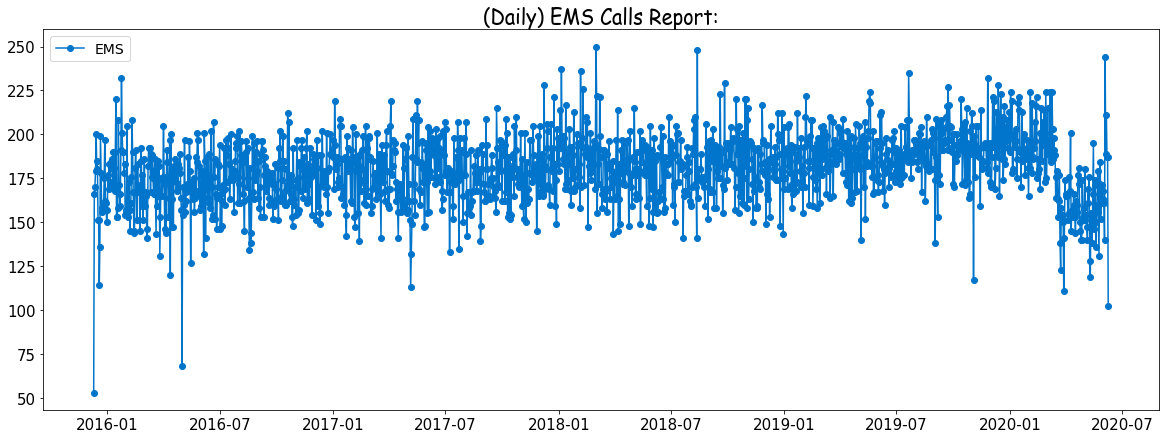

In [30]:
plt.figure(figsize=(20, 7))
plt.title("(Daily) EMS Calls Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

plt.plot(ems_results, color="#0075CB", marker="o", label="EMS")
plt.tick_params(labelsize=15)
plt.legend(loc=2, prop={"size": 14})
plt.show()

#### QUESTION 6: (Fire) calls per Day?

In [32]:
fire_results = calls[calls.Reason == "Fire"].groupby("Date")["Reason"].count()
print(fire_results.head(10))

Date
2015-12-10    13
2015-12-11    59
2015-12-12    54
2015-12-13    47
2015-12-14    35
2015-12-15    40
2015-12-16    47
2015-12-17    45
2015-12-18    32
2015-12-19    44
Name: Reason, dtype: int64


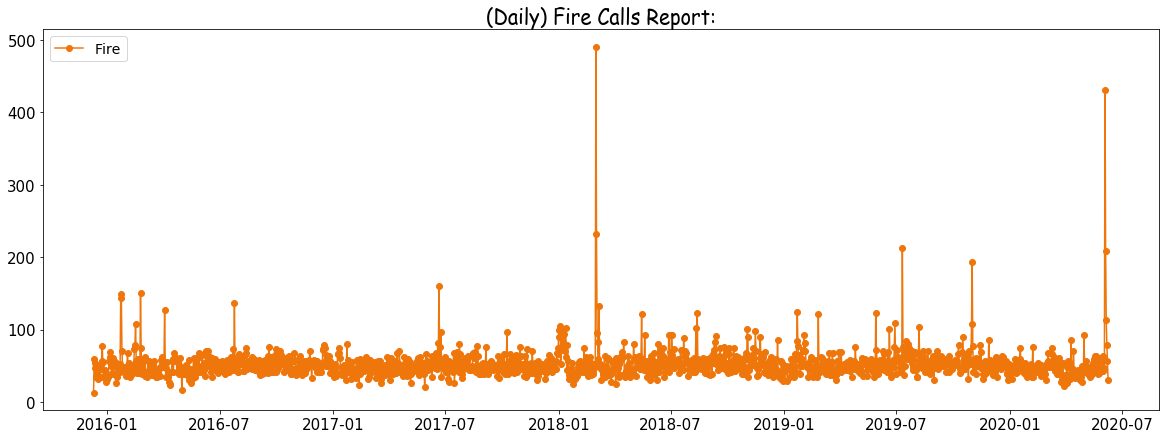

In [33]:
plt.figure(figsize=(20, 7))
plt.title("(Daily) Fire Calls Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

plt.plot(fire_results, color="#EE760B", marker="o", label="Fire")
plt.tick_params(labelsize=15)
plt.legend(loc=2, prop={"size": 14})
plt.show()

#### QUESTION 7: Traffic calls per Day?

In [34]:
traffic_results = calls[calls.Reason == "Traffic"].groupby("Date")["Reason"].count()
print(traffic_results.head(10))

Date
2015-12-10     34
2015-12-11    107
2015-12-12    110
2015-12-13     53
2015-12-14    150
2015-12-15    160
2015-12-16    111
2015-12-17    140
2015-12-18    123
2015-12-19     81
Name: Reason, dtype: int64


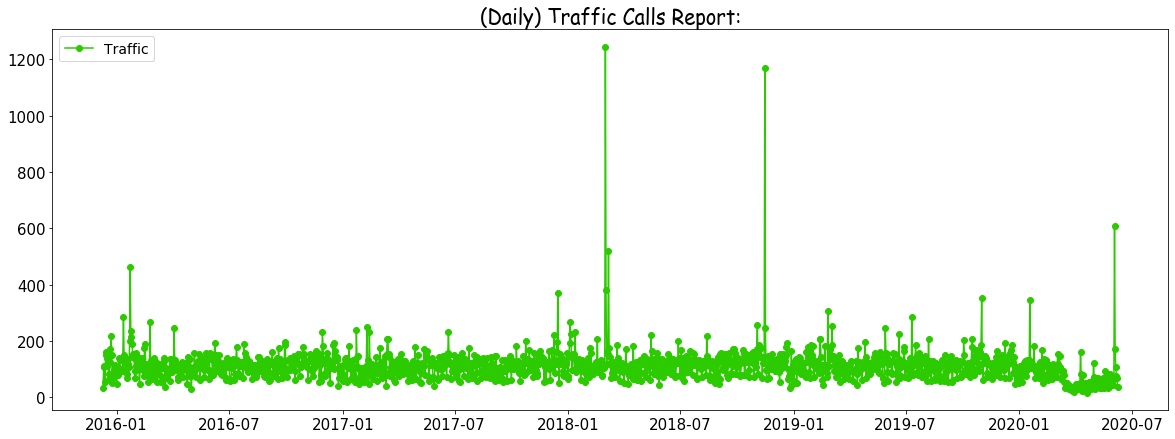

In [35]:
plt.figure(figsize=(20, 7))
plt.title("(Daily) Traffic Calls Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

plt.plot(traffic_results, color="#2BCB00", marker="o", label="Traffic")
plt.tick_params(labelsize=15)
plt.legend(loc=2, prop={"size": 14})
plt.show()

#### QUESTION 8: Create a Heatmap for each (Day)?

In [36]:
calls["Hour"] = calls.timeStamp.dt.hour
hour_results = calls.groupby(by=["Day of Week", "Hour"])["Reason"].count().unstack()

## Solution 2: (use a pivot table, both equal difficult.)
calls.pivot_table(index="Day of Week", columns="Hour", values="lat", aggfunc="count")

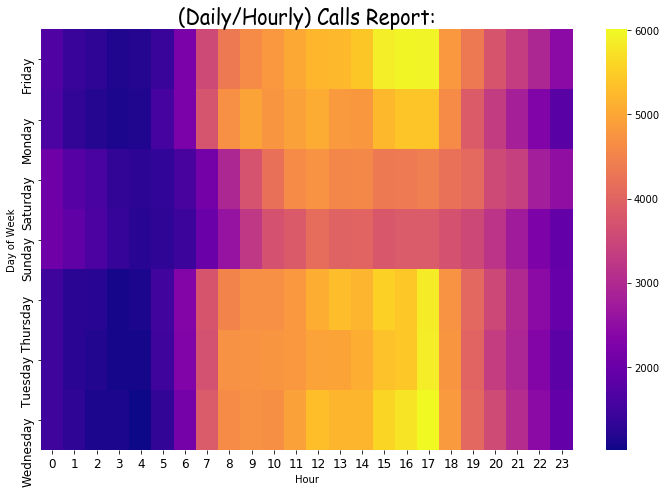

In [39]:
plt.figure(figsize=(10, 7))
plt.title("(Daily/Hourly) Calls Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

sns.heatmap(hour_results, cmap="plasma");
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [40]:
## Conclusion:
## Surge of calls on 'Wednesday and Firday' between 15:00-17:00.
## More calls come in the Evenings, but fewer calls during the Night.
## Fewer 911 calls also on the weekends.

<Figure size 720x504 with 0 Axes>

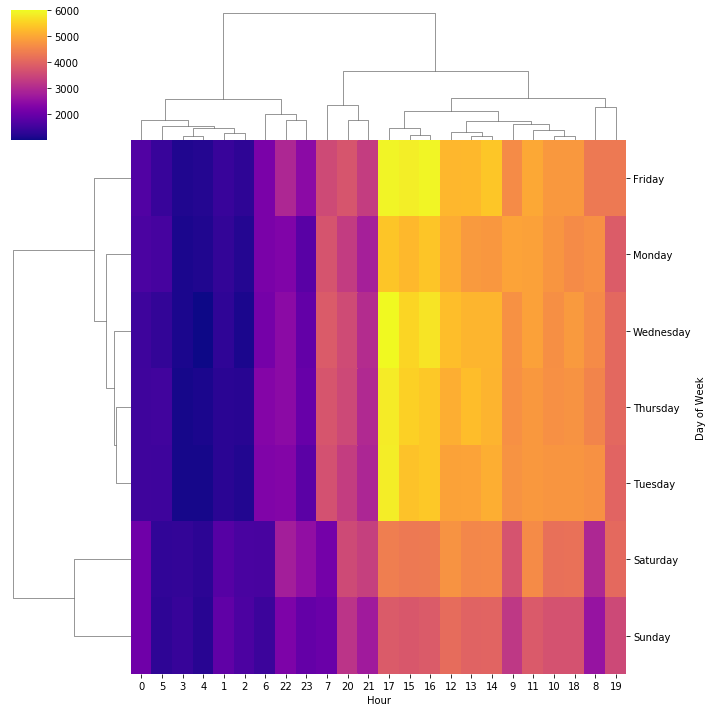

In [41]:
plt.figure(figsize=(10, 7))
sns.clustermap(hour_results, cmap="plasma");

#### QUESTION 9: Create a Heatmap for each (Month)?

In [42]:
month_results = calls.groupby(by=["Day of Week", "Month"])["Reason"].count().unstack()

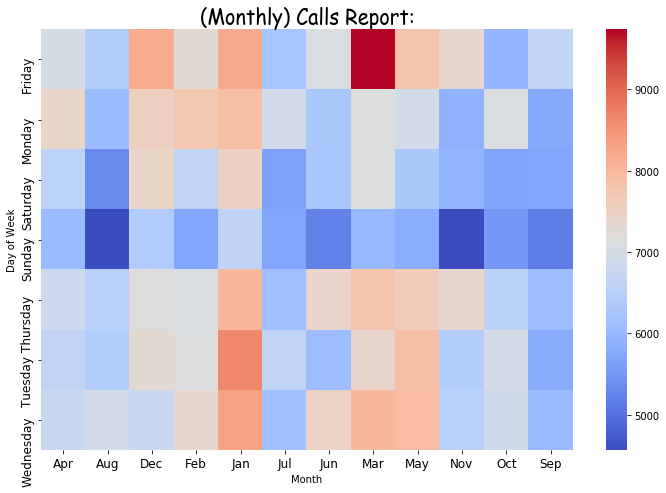

In [43]:
plt.figure(figsize=(10, 7))
plt.title("(Monthly) Calls Report:", fontdict={"fontsize":"20", "fontname":"Comic Sans MS"})

sns.heatmap(month_results, cmap="coolwarm")
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show()

In [44]:
## Conclusion:
## Highest number of 991 calls in 'March' on Friday.
## Least number of calls in September, (Safest Month) throughout the Year.

<Figure size 720x504 with 0 Axes>

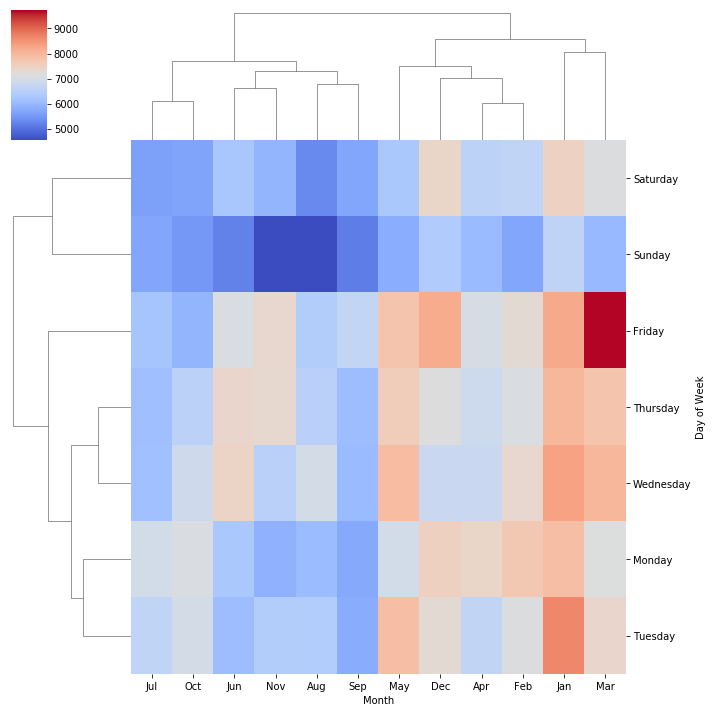

In [45]:
plt.figure(figsize=(10, 7))
sns.clustermap(month_results, cmap="coolwarm");